<a href="https://colab.research.google.com/github/kozoB/IrisClassificationANN/blob/main/IrisClassificationMulticlass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flowers Classification With Deep Learning Model

Deep learning model to classify Iris flower using the 'Iris' dataset from "UC Irvine Machine Learning Repository" to train and test on.

Creating DL model using 'pytorch' library

# Import Libraries

In [214]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

import matplotlib
import sklearn

import pandas as pd
import numpy as np


# Import Iris Dataset

In [215]:
!pip install ucimlrepo

In [216]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

# Preprocess Dataset

In [217]:
print(X)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [218]:
print (y)

              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


## Encode Labels

In [219]:
from sklearn.preprocessing import OneHotEncoder

labels = ["Iris-setosa","Iris-versicolor", "Iris-virginica"]

# Create encoder
encoder = OneHotEncoder(sparse=False)

# Encode labels
y = encoder.fit_transform(y)

print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [220]:
batch_size = 30

## Split Data To Train And Test Sets

In [221]:
from sklearn.model_selection import train_test_split

# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

# Convert dataset to torch tensors
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use GPU if available
else:
    device = torch.device("cpu")  # Use CPU

# Convert to numpy array before creating pytorch tensor
X_train_numpy = X_train.to_numpy()
X_test_numpy = X_test.to_numpy()

# Create pytorch tensors
X_train_tensor = torch.from_numpy(X_train_numpy).to(device=device, dtype=torch.float32)
y_train_tensor = torch.from_numpy(y_train).to(device=device, dtype=torch.float32)
X_test_tensor = torch.from_numpy(X_test_numpy).to(device=device, dtype=torch.float32)
y_test_tensor = torch.from_numpy(y_test).to(device=device, dtype=torch.float32)

print(X_train_tensor.dtype)
print(X_test_tensor.dtype)
print(y_train_tensor.dtype)
print(y_test_tensor.dtype)

# Create dataloader out of train and test tensors
train_loader = DataLoader(
    dataset=torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor),
    batch_size=batch_size,  # Replace with your desired batch size
    shuffle=True  # Shuffle data for each epoch (recommended for training)
)

# Testing data loader (no shuffling needed for testing)
test_loader = DataLoader(
    dataset=torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor),
    batch_size=batch_size
)


(120, 4)
(120, 3)
(30, 4)
(30, 3)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
torch.float32
torch.float32
torch.float32
torch.float32


## Dataloaders info

In [222]:
from itertools import islice

# Show info about the train dataloader
print("Train dataloader info:\n")
print(f"Number of batches: {len(train_loader)}")
print(f"Batch size: {train_loader.batch_size}")

for batch_idx, (data, target) in enumerate(islice(train_loader, 4)):
    print(f"Batch {batch_idx+1}:")
    print("Data shape:", data.shape)
    print("Target shape:", target.shape)

# Show info about the test dataloader
print("\nTest dataloader info:\n")
print(f"Number of batches: {len(test_loader)}")
print(f"Batch size: {test_loader.batch_size}")

for batch_idx, (data, target) in enumerate(islice(test_loader, 1)):
    print(f"Batch {batch_idx+1}:")
    print("Data shape:", data.shape)
    print("Target shape:", target.shape)

Train dataloader info:

Number of batches: 4
Batch size: 30
Batch 1:
Data shape: torch.Size([30, 4])
Target shape: torch.Size([30, 3])
Batch 2:
Data shape: torch.Size([30, 4])
Target shape: torch.Size([30, 3])
Batch 3:
Data shape: torch.Size([30, 4])
Target shape: torch.Size([30, 3])
Batch 4:
Data shape: torch.Size([30, 4])
Target shape: torch.Size([30, 3])

Test dataloader info:

Number of batches: 1
Batch size: 30
Batch 1:
Data shape: torch.Size([30, 4])
Target shape: torch.Size([30, 3])


# Define Model

## Define input and output numbers of the model

In [223]:
# Input number (number of features in dataset)
features_num = next(iter(train_loader))[0].shape[1]
# Output number (number of labels in dataset)
labels_num = next(iter(train_loader))[1].shape[1]

print(f"input num: {features_num}")
print(f"output num: {labels_num}")

input num: 4
output num: 3


## Create Model Object

A learning rate of 0.01 is used as the dataset is easy to learn and there is no need for a lower learning rate.
The model converges faster

In [224]:
lr = 0.01

In [225]:
def CreateModel():
  model = nn.Sequential(
      nn.Linear(features_num, 32),
      nn.ReLU(),
      nn.Linear(32, 32),
      nn.ReLU(),
      nn.Linear(32, labels_num),
  )

  loss_fun = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=lr)

  return model, loss_fun, optimizer

## Model Info

In [226]:
nn_model, loss_fun, optimizer = CreateModel()
print(nn_model)
print(optimizer)
print(loss_fun)

Sequential(
  (0): Linear(in_features=4, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=3, bias=True)
)
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
CrossEntropyLoss()


# Train Model

Model training loop over 1000 epochs and batches of 30

1000 epochs are enough for the model to converge on a solution

In [244]:
def TrainModel():
  epochs = 1000

  trainAcc = []
  testAcc  = []
  losses   = []

  # loop over epochs
  for epoch in range(epochs):
    # loop over batches
    batchAcc  = []
    batchLoss = []

    for X,y in train_loader:
      nn_model.train()

      # forward pass
      y_hat = nn_model(X)

      # compute loss
      loss = loss_fun(y_hat, y)

      # back prop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute batch average training accuracy
      # Convert one-hot encoded labels (y) to class indices
      y_hat_indices = torch.argmax(nn.functional.softmax(y_hat), axis=1)
      y_indices = torch.argmax(y,axis=1)

      # print(y)
      # print(nn.functional.softmax(y_hat))
      # print("\n")
      # print(y_indices)
      # print(y_hat_indices)

      # Calculate accuracy
      batchAcc.append(100 * torch.mean((y_hat_indices == y_indices).float()).item())
      batchLoss.append( loss.item() )

    # average batches training accuracy
    trainAcc.append( np.mean(batchAcc) )
    losses.append( np.mean(batchLoss) )

    # test accuracy
    nn_model.eval()
    X,y = next(iter(test_loader))
    predLabels = torch.argmax(nn.functional.softmax(nn_model(X)),axis=1)
    y_test_indices = torch.argmax(y,axis=1)

    testAcc.append( 100*torch.mean((predLabels == y_test_indices).float()).item() )

  return trainAcc, testAcc, losses


In [ ]:
trainAcc, testAcc, losses = TrainModel()

Plot the accuracy and loss results over epochs

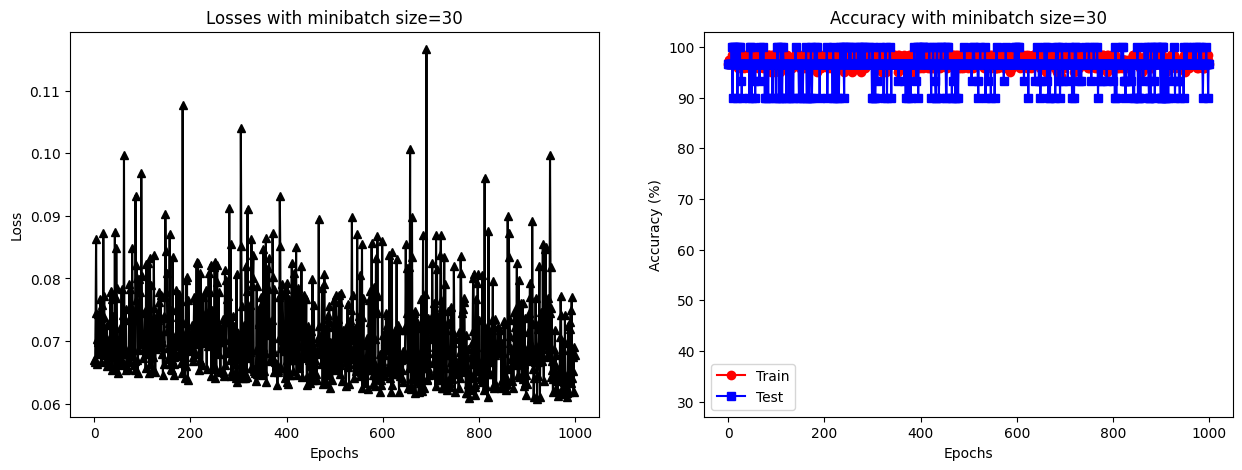

In [251]:
import matplotlib.pyplot as plt

# plot the results
fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with minibatch size=' + str(30))

ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_title('Accuracy with minibatch size=' + str(30))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27,103])

plt.show()

mean accuracy of train and tests sets, as well as loss mean

In [254]:
print(f"train accuracy mean: {np.mean(trainAcc):.2f}")
print(f"test accuracy mean: {np.mean(testAcc):.2f}")
print(f"loss mean: {np.mean(losses):.2f}")

train accuracy mean: 97.20
test accuracy mean: 96.26
loss mean: 0.07


High accuracy of train and test sets - the problem we are trying to solve here is a simple one, with a simple dataset - only 4 features to train on,
thus having a high accuracy.
The dataset itself is small and has no need for any more data for the model to converge on a high accuracy solution.

Test model - predicting test set and showing predicted labels against actual labels

In [255]:
X,y = next(iter(test_loader))

predictions = torch.argmax(nn.functional.softmax(nn_model(X)),axis=1)
actual_labels = torch.argmax(y,axis=1)

print(f"prediction: {predictions}")
print(f"actual label: {actual_labels}")

prediction: tensor([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])
actual label: tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])


<ipython-input-255-3e2efc0b34ee>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predictions = torch.argmax(nn.functional.softmax(nn_model(X)),axis=1)
